# Structural Estimation

In [3]:
import numpy as np
import numpy.random as rnd
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
import scipy.optimize as opt
import math
import scipy
import scipy.integrate as integrate
from scipy import stats as sts
from numpy import linalg as la

## Exercise 1

### Part 1

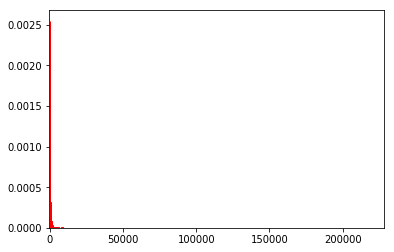

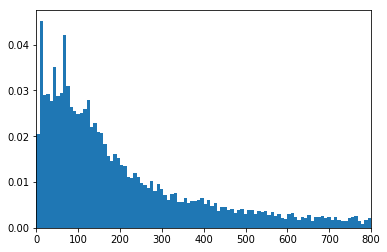

In [2]:
#Import txt file with claim data
claims = np.loadtxt("Data/clms.txt")
# Plot histograms NOTE PERCENT THING IS WRONG MUST CHANGE

weights = (1 / len(claims)) * np.ones_like(claims)

plt.hist(claims, density=True, bins= 1000, weights = weights, edgecolor="red")
plt.xlim(-500, claims.max())
plt.show()

weightslimited = 1/(len(claims[claims<800])) * np.ones_like(claims[claims<800])

plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.xlim(0, 800)
plt.show()
    

The second histogram is preferable to the first one, because the data is actually legible.

### Part b

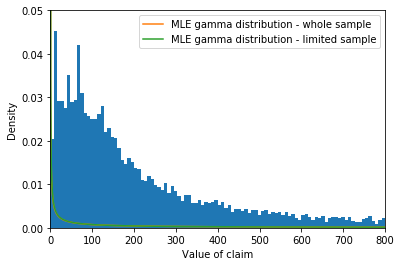

 Whole Sample: 
 alpha =  0.22175531700084541 
 beta =  21911.06469927569 
 Limited Sample: 
 alpha =  0.20348864099178415 
 beta =  21911.064699783838


In [3]:
#define clean part of f.
claimslimited = claims[claims<800]

#Define a function for the gamma distribution
def GApdf(x, alpha, beta):
    pdfval = 1/(beta ** alpha * (math.gamma(alpha)) ) \
             * x ** (alpha- 1) * np.exp(-(x/beta))
    return pdfval

#Define criterion function
def crit1b(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta
    '''
    X = args
    alpha, beta = params
    #Get log-likelihood
    pdfval = GApdf(X, alpha, beta)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = np.sum(log_pdf_val)
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0
guess = [alpha0, beta0]

#Pull results
bds = ((1e-5, None), (1e-5, None))
results = opt.minimize(crit1b, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1b, guess, args = claimslimited, bounds = bds)
alpha, beta = results.x
GAerr = results.fun
alphalimited, betalimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GApdf(xgrid, alpha, beta)
limitedresultsgrid = GApdf(xgrid, alphalimited, betalimited)

#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE gamma distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE gamma distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()


#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
      "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited)

Weirdly it doesn't even seem to matter if I limit my sample to only the observations which are less than 800.

### Part c

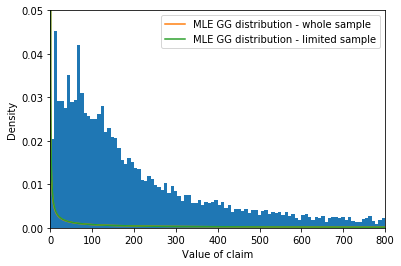

 Whole Sample: 
 alpha =  0.22175388191916012 
 beta =  21911.06437456292 
 m = 0.9977001712681741 
 Limited Sample: 
 alpha =  0.2034851449617037 
 beta =  21911.064638789405 
 m =  0.8868958758893984


In [4]:
#Define a function for the gamma distribution
def GGpdf(x, alpha, beta, m):
    pdfval = m/(beta ** alpha * (math.gamma(alpha/m)) ) \
             * x ** (alpha- 1) * np.exp(-(x/beta)**m)
    return pdfval

#Define criterion function
def crit1c(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta, m
    '''
    X = args
    alpha, beta, m = params
    #Get log-likelihood
    pdfval = GGpdf(X, alpha, beta, m)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = np.sum(log_pdf_val)
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0
m0 = 1
guess = [alpha0, beta0, m0]

#Pull results
bds = ((1e-5, None), (1e-5, None), (1e-5, None))
results = opt.minimize(crit1c, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1c, guess, args = claimslimited, bounds = bds)
alpha, beta, m = results.x
GGerr = results.fun
alphalimited, betalimited, mlimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GGpdf(xgrid, alpha, beta, m)
limitedresultsgrid = GGpdf(xgrid, alphalimited, betalimited, mlimited)

#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE GG distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE GG distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()


#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
       "\n m =", m, \
      "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited, \
       "\n m = ", mlimited)


### Part (d)

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


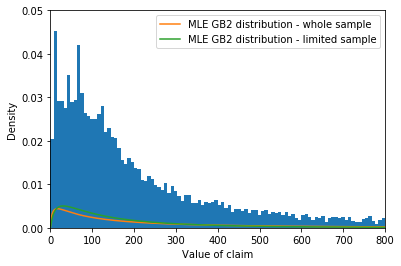

 Whole Sample: 
 alpha =  0.1167647113351249 
 beta =  4369053.399665508 
 p = 42.3269118445406 
 q = 136.02519678958396 
 Limited Sample: 
 alpha =  0.29450829415616064 
 beta =  4369053.4000016805 
 p = 9.569363701367902 
 q = 200.02765473268164


74882.90413644866

In [20]:
#define clean part of f.
claimslimited = claims[claims<800]

#Define a function for the gamma distribution
def GB2pdf(x, alpha, beta, p, q):
    pdfval = alpha*x**(alpha*p-1) / (beta**(alpha*p) \
             *scipy.special.beta(p, q)*(1+(x/beta)**alpha)**(p+q))
    return pdfval

#Define criterion function
def crit1d(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta, p, q
    '''
    X = args
    alpha, beta, p, q = params
    #Get log-likelihood
    pdfval = GB2pdf(X, alpha, beta, p, q)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = log_pdf_val.sum()
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess (using earlier vals)
beta0 = 21911 * 200 / (1/.997)
alpha0= .9977
p0 = .22175/21911
q0 = 200

guess = [alpha0, beta0, p0, q0]

#Pull results
bds = ((1e-5, None), (1e-5, None), (1e-5, None), (1e-5, None))
results = opt.minimize(crit1d, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1d, guess, args = claimslimited, bounds = bds)
alpha, beta, p ,q = results.x
GB2err = crit1d([alpha, beta, p, q], claims)
alphalimited, betalimited, plimited, qlimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GB2pdf(xgrid, alpha, beta, p, q)
limitedresultsgrid = GB2pdf(xgrid, alphalimited, betalimited, plimited, qlimited)

#limitedresultsgrid = GB2pdf(xgrid, .1, 4450000, 51, 150)



#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE GB2 distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE GB2 distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()

#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
       "\n p =", p, \
       "\n q =", q, \
       "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited,
       "\n p =", plimited, \
       "\n q =", qlimited )
GB2err

I'll stick to only looking at the whole sample estimates for the next 2 problems.

This estimate is very sensitive to inital guess by the way.

### part (e)

In [21]:
# Two likelihood ratio tests
LRGA = 2 * (np.log(GB2err) - np.log(GAerr))
LRGG = 2 * (np.log(GB2err) - np.log(GGerr))

pGA = chi2.cdf(LRGA, df=4) 
pGG = chi2.cdf(LRGG, df=4)
print("Chi squared test for GG:", pGG, "Chi squared test for GA:", pGA)
print("Which makes sense cause the distributions visibly \
look nothing like each other.")

Chi squared test for GG: 0.0 Chi squared test for GA: 0.0
Which makes sense cause the distributions visibly look nothing like each other.


### part (f)

In [31]:
#Find value of cdf at point x = 1000
GBcdf1000 = integrate.quad(lambda x: GB2pdf(x, alpha, beta, p, q), 0, 1000)
GAcdf1000 = integrate.quad(lambda x: GApdf(x, 0.22175532, 21911.064), 0, 1000)
print("Probability of claim > 1000 using GB functional form:", GBcdf1000[0], 
     "\nProbability of claim > 1000 using GA functional form:", GAcdf1000[0])
print("So we see that these are two very different estimates.")

Probability of claim > 1000 using GB functional form: 0.8682939937886892 
Probability of claim > 1000 using GA functional form: 0.5480402635248244
So we see that these are two very different estimates.


## Exercise 2

In [2]:
#Readin
data = pd.read_csv("Data/MacroSeries.txt", header = None)
data.columns = ['c','k','w','r','y']

### Part (a)

I went to war with this one for hours, but I couldn't get my algorithm to converge, so I just used Tim's code.

In [3]:
macdata = pd.read_csv('Data/MacroSeries.txt', header=None)
macdata.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

In [4]:
def get_z(w, k, alpha): 
    '''Get me a series of z's for some series of k and w and a parameter alpha'''
    zt = np.log(w/((1-alpha)*k**alpha))
    return zt
    
def log_lik_BM_1(w, k, alpha, mu, sigma, rho):
    '''Get me the log likelihood of the z values pdf for some data and params'''
    zvals = get_z(w, k, alpha)
    log_lik_val = 0
    for i in range(len(zvals)):
        if i == 0:
            pdf_val = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf_val = norm.pdf(zvals[i], loc=(rho*zvals[i-1] + (1-rho)*mu), scale=sigma)
        ln_pdf_val = np.log(pdf_val)
        log_lik_val += ln_pdf_val
    return log_lik_val

def crit_BM_1(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    alpha, mu, sigma, rho = params
    w, k = args
    log_lik_val = log_lik_BM_1(w, k, alpha, mu, sigma, rho)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val

In [5]:
params_init_BM_1 = np.array([0.5, 0.5, 0.4, 0.8])
mle_BM_args = (macdata.wt, macdata.kt)
results_BM_1 = opt.minimize(crit_BM_1, params_init_BM_1, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
alpha_mle, mu_mle, sigma_mle, rho_mle = results_BM_1.x
loglikval_BM = -results_BM_1.fun
IHVCV = results_BM_1.hess_inv.todense()
#Use rick's algorithm to take negative elements of off-diagonal
print('alpha_mle=', alpha_mle, '\n mu_mle=', mu_mle, '\n sigma_mle:', sigma_mle, '\n rho_mle:', rho_mle, '\n Loglikvalmax=', loglikval_BM, "\n InvHessVarCovar = \n", IHVCV)

alpha_mle= 0.5533989403081769 
 mu_mle= 8.10661598038206 
 sigma_mle: 0.09278034350323677 
 rho_mle: 0.8246532145841554 
 Loglikvalmax= 95.85827569127504 
 InvHessVarCovar = 
 [[ 1.18786630e+00 -1.70051583e+01  2.84380628e-01 -1.17479934e+00]
 [-1.70051583e+01  2.43520335e+02 -4.04137179e+00  1.67920846e+01]
 [ 2.84380628e-01 -4.04137179e+00  8.48410384e-02 -3.00026501e-01]
 [-1.17479934e+00  1.67920846e+01 -3.00026501e-01  1.18853514e+00]]


### Part (b)

In [6]:
def get_z_2(r, k, alpha): 
    '''Get me a series of z's for some series of k and r and a parameter alpha'''
    zt = np.log(r/((alpha)*k**(alpha-1)))
    return zt
    
def log_lik_BM_2(r, k, alpha, mu, sigma, rho):
    '''Get me the log likelihood of the z values pdf for some data and params'''
    zvals = get_z_2(r, k, alpha)
    log_lik_val = 0
    for i in range(len(zvals)):
        if i == 0:
            pdf_val = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf_val = norm.pdf(zvals[i], loc=(rho*zvals[i-1] + (1-rho)*mu), scale=sigma)
        ln_pdf_val = np.log(pdf_val)
        log_lik_val += ln_pdf_val
    return log_lik_val

def crit_BM_2(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    alpha, mu, sigma, rho = params
    r, k = args
    log_lik_val = log_lik_BM_2(r, k, alpha, mu, sigma, rho)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val


In [7]:
params_init_BM_2 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args = (macdata.rt, macdata.kt)
results_BM_2 = opt.minimize(crit_BM_2, params_init_BM_2, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
alpha_mle, mu_mle, sigma_mle, rho_mle = results_BM_2.x
loglikval_BM = -results_BM_2.fun
IHVCV = -results_BM_2.hess_inv.todense()
#print(results_BM_2)
print('alpha_mle=', alpha_mle, '\n mu_mle=', mu_mle, '\n sigma_mle:', sigma_mle, '\n rho_mle:', rho_mle, '\n Loglikvalmax=', loglikval_BM, "\n InvHessVarCovar = \n", IHVCV)

alpha_mle= 0.553340406136769 
 mu_mle= 7.570429565482019 
 sigma_mle: 0.09278247677902113 
 rho_mle: 0.8246543401866663 
 Loglikvalmax= 95.85827530681503 
 InvHessVarCovar = 
 [[-1.12980211e+01  1.88462796e+02 -6.75337000e-01  6.34534111e+00]
 [ 1.88462796e+02 -3.14933614e+03  9.79680551e+00 -1.00129641e+02]
 [-6.75337000e-01  9.79680551e+00 -4.27523164e-01  1.88726805e+00]
 [ 6.34534111e+00 -1.00129641e+02  1.88726805e+00 -9.44329792e+00]]


### Part (c)

In [8]:
#get estimates from part a 
params_init_BM_1 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args = (macdata.wt, macdata.kt)
results_BM_1 = opt.minimize(crit_BM_1, params_init_BM_1, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
params = results_BM_1.x
print(params)

[0.55339501 8.1066701  0.09278029 0.82465579]


In [9]:
# I will define a more general function.
def intgreaterthan(r, k, ztm1, params):
    '''
    This function gives the probability that the interest
    rate is greater than r given inputs k, ztm1, the capital
    in the current period and shock from last period
    '''
    alpha, mu, sigma, rho = params
    #get z_t such that r is the interest rate
    impliedz = get_z_2(r, k, alpha)
    #find probability tht z_t > impliedz
    cdf = norm.cdf(impliedz, (rho * ztm1 + (1 - rho) * mu), sigma)
    prob = 1 - cdf
    return prob

print("Probaility that interest rate > 1 is:", intgreaterthan(1, 7500000, 10, params))

Probaility that interest rate > 1 is: 1.0


# GMM

## Problem 3

Note: It's probably bad practice, but I re-used function names so you must make sure to run the code from this problem in order.

### Part (a)

Text(0.5,1,'Income distribution in U.S')

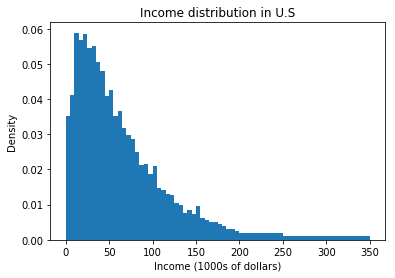

In [10]:
data = pd.read_table("Data/usincmoms.txt", header = None)
data.columns = ["Percent", "Midpoint"]
#scale midpoints to be in 1000s
data.Midpoint = data.Midpoint/1000

#grab weights
wts = data.Percent.copy()

#Fix weights at tail
wts[41] = wts[41]/20
wts[40] = wts[40]/10

#plot
bins = np.append(np.linspace(0, 200, 41), [250, 350])

plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

In [11]:
#Define Log-normal pdf 
def lognormpdf(x, mu, sigma):
    '''
    lognorm pdf. x >= 0, sigma > 0, mu is any number
    '''
    out = (1 / (x * sigma * np.sqrt(2 * np.pi))) * \
    np.exp(- ((np.log(x) - mu)**2 / (2 * sigma**2)))
    return out

#Define the model moments
def model_moments(mu, sigma):
    '''
    Function computes 42 model moments for generalized 
    method of moments.
    
    Uses method of quadrature to estimate the integrals for
    quantile moments of the lognormal pdf.
    
    Requires you to have a well-defined "bins."
    '''
    N = len(bins)
    moms_mod = np.zeros(N-1)
    for i in range(N-1):
        moms_mod[i] = integrate.quad(lambda x: lognormpdf(x, mu, sigma), bins[i], bins[i+1])[0]
    return moms_mod 

#Define an error function
def err_vec(data, mu, sigma, simple=False):
    '''
    Function computes the vector of moment errors for GMM
    Fits a log-normal distribution.
    
    if simple is true errors are simple difference, if false they
    are perent deviation.
    '''
    moms_data = np.array(data.Percent)
    moms_mod = model_moments(mu, sigma)
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    return err_vec

def criterion(params, args):
    '''
    Define criterion function using the L2-norm (sum of squared 
    errors) using given parameters.
    '''
    mu, sigma = params
    data, W = args
    err = err_vec(data, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    return crit_val


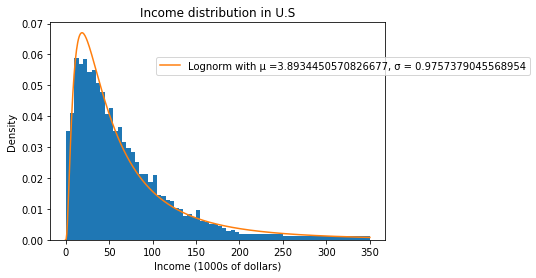

In [12]:
#Perform GMM estimation

#Inital guesses for params
#mean initial guess is log of average mean
mu_guess = np.log(np.sum(data.Percent * data.Midpoint))
#arbitrary sigma initial guess
sig_guess = 1.1
params_init=np.array([mu_guess, sig_guess])

# Define weighting Matrix
W = np.diag(data.Percent)
gmm_args = np.array([data, W])

results = opt.minimize(criterion, params_init, args=gmm_args,  method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
#criterion(params_init, gmm_args)
mu_GMM, sig_GMM = results.x

#print("Error vec", err_vec(data, mu_GMM, sig_GMM))
#print("Model moments", np.sum(model_moments(5, 1)))
#print("Data moments:", np.array(data.Percent))

xgrid = np.linspace(1e-9, 350, 500)
plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")
#Multiply distribution by 5 to account for fact that bins are of width 5
plt.plot(xgrid, 5*lognormpdf(xgrid, mu_GMM, sig_GMM), label = f"Lognorm with μ ={mu_GMM}, σ = {sig_GMM}")
plt.legend(loc='center left', bbox_to_anchor=(.3, 0.8))
error_LN = results.fun

Looks good!

### Part (c)

In [13]:
#Define a function for the gamma distribution
def GApdf(x, alpha, beta):
    pdfval = 1/(beta ** alpha * (math.gamma(alpha))) \
             * x ** (alpha- 1) * np.exp(-(x/beta))
    return pdfval

#Implement method from previous problem - define functions:
#Define model_moments
def model_moments(alpha, beta):
    '''
    Function computes 42 model moments for generalized 
    method of moments.
    
    Uses method of quadrature to estimate the integrals for
    quantile moments of the lognormal pdf.
    
    Requires you to have a well-defined "bins."
    '''
    N = len(bins)
    moms_mod = np.zeros(N-1)
    for i in range(N-1):
        moms_mod[i] = integrate.quad(lambda x: GApdf(x, alpha, beta), bins[i], bins[i+1])[0]
    return moms_mod 

#Define an error function
def err_vec(data, alpha, beta, simple=False):
    '''
    Function computes the vector of moment errors for GMM
    Fits a log-normal distribution.
    
    if simple is true errors are simple difference, if false they
    are perent deviation.
    '''
    moms_data = np.array(data.Percent)
    moms_mod = model_moments(alpha, beta)
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    return err_vec

def criterion(params, args):
    '''
    Define criterion function using the L2-norm (sum of squared 
    errors) using given parameters.
    '''
    alpha, beta = params
    data, W = args
    err = err_vec(data, alpha, beta, simple=False)
    crit_val = err.T @ W @ err
    return crit_val


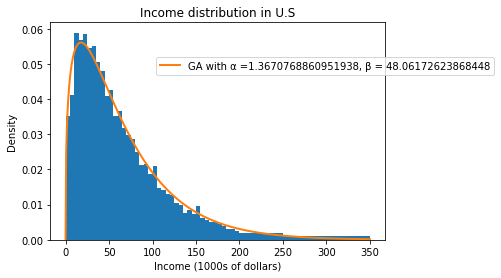

In [14]:
#Perform GMM estimation

#Inital guesses for params
#mean initial guess is log of average mean
alpha_guess = 3
#arbitrary sigma initial guess
beta_guess = 20
params_init=np.array([alpha_guess, beta_guess])

# Define weighting Matrix
W = np.diag(data.Percent)
gmm_args = np.array([data, W])

results = opt.minimize(criterion, params_init,  method='L-BFGS-B', args=gmm_args, bounds=((1e-10, None), (1e-10, None)))
#criterion(params_init, gmm_args)
alpha_GMM, beta_GMM = results.x

#print("Error vec", err_vec(data, mu_GMM, sig_GMM))
#print("Model moments", model_moments(5, 1))
#print("Data moments:", np.array(data.Percent))


xgrid = np.linspace(1e-9, 350, 500)
plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")
plt.plot(xgrid, 5*GApdf(xgrid, alpha_GMM, beta_GMM), label = f"GA with α ={alpha_GMM}, β = {beta_GMM}", linewidth = 2)
plt.legend(loc='center left', bbox_to_anchor=(.3, 0.8), prop = {'size': 10})
error_GA = results.fun

### Part (d)

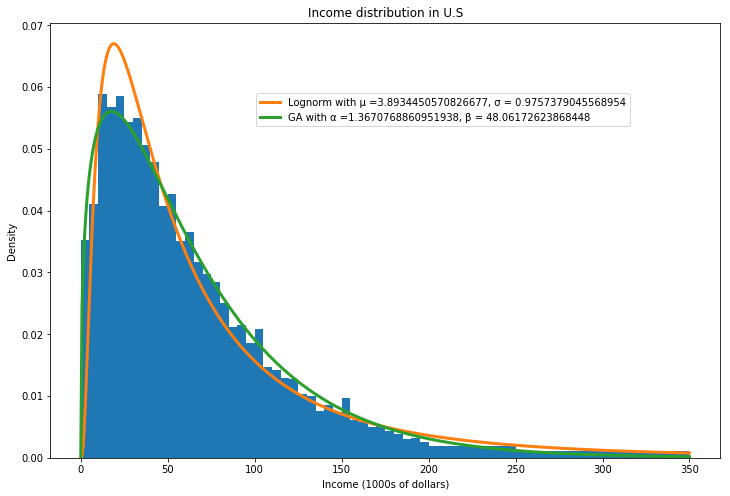

Error for GA: 0.014084919481775995 
 Error for LN: 0.03551648133430143


In [20]:
fig, ax = plt.subplots(figsize = (12, 8))
xgrid = np.linspace(1e-9, 350, 500)
plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")
plt.plot(xgrid, 5*lognormpdf(xgrid, mu_GMM, sig_GMM), label = f"Lognorm with μ ={mu_GMM}, σ = {sig_GMM}", linewidth = 3)
plt.plot(xgrid, 5*GApdf(xgrid, alpha_GMM, beta_GMM), label = f"GA with α ={alpha_GMM}, β = {beta_GMM}", linewidth = 3)
plt.legend(loc='center left', bbox_to_anchor=(.3, 0.8), prop = {'size': 10})
plt.show()

#I grabbed the errors from the objective function in the earlier parts, and I print them here
print("Error for GA:", error_GA, "\n Error for LN:", error_LN)

Gamma distribution looks nicer to me. And indeed the errors tell us that gamma matches the moments better than log-normal.

### Part (e)

In [18]:
#Re-define the procedure.
#Define model_moments
def model_moments(alpha, beta):
    '''
    Function computes 42 model moments for generalized 
    method of moments.
    
    Uses method of quadrature to estimate the integrals for
    quantile moments of the lognormal pdf.
    
    Requires you to have a well-defined "bins."
    '''
    N = len(bins)
    moms_mod = np.zeros(N-1)
    for i in range(N-1):
        moms_mod[i] = integrate.quad(lambda x: GApdf(x, alpha, beta), bins[i], bins[i+1])[0]
    return moms_mod 

#Define an error function
def err_vec(data, alpha, beta, simple=False):
    '''
    Function computes the vector of moment errors for GMM
    Fits a log-normal distribution.
    
    if simple is true errors are simple difference, if false they
    are perent deviation.
    '''
    moms_data = np.array(data.Percent)
    moms_mod = model_moments(alpha, beta)
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    return err_vec

def criterion(params, args):
    '''
    Define criterion function using the L2-norm (sum of squared 
    errors) using given parameters.
    '''
    alpha, beta = params
    data, W = args
    err = err_vec(data, alpha, beta, simple=False)
    crit_val = err.T @ W @ err
    return crit_val

[[ 0.03536027  0.01958323  0.00602008 ... -0.00545793 -0.00720907
  -0.01162247]
 [ 0.01958323  0.01084559  0.00333404 ... -0.00302271 -0.00399253
  -0.00643676]
 [ 0.00602008  0.00333404  0.00102492 ... -0.00092921 -0.00122734
  -0.00197872]
 ...
 [-0.00545793 -0.00302271 -0.00092921 ...  0.00084244  0.00111273
   0.00179395]
 [-0.00720907 -0.00399253 -0.00122734 ...  0.00111273  0.00146975
   0.00236953]
 [-0.01162247 -0.00643676 -0.00197872 ...  0.00179395  0.00236953
   0.00382016]]


      fun: 7.714897586084394e-16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.06037599e-08, -2.09798557e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 15
      nit: 3
   status: 0
  success: True
        x: array([ 1.32708449, 50.00052031])

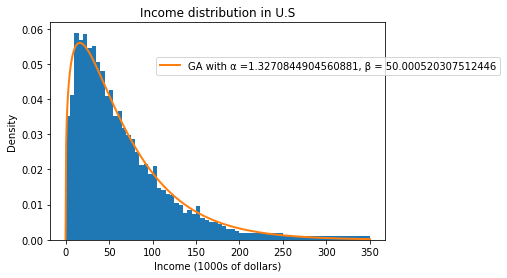

In [24]:
alpha_guess = 1.3
beta_guess = 50

params_init=np.array([alpha_guess, beta_guess])

# Define weighting Matrix
err1 = err_vec(data, alpha_GMM, beta_GMM)
VCV2 = np.outer(err1.T, err1)
#VCV2 = VCV2 / VCV2.shape[0]
W_new = la.pinv(VCV2)

print(W_new)
W = W_new
#W = np.diag(data.Percent)
gmm_args = np.array([data, W])

results = opt.minimize(criterion, params_init, args=gmm_args, bounds=((1e-10, None), (1e-10, None)))
#criterion(params_init, gmm_args)
alpha_GMM, beta_GMM = results.x


xgrid = np.linspace(1e-9, 350, 500)
plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")
plt.plot(xgrid, 5*GApdf(xgrid, alpha_GMM, beta_GMM), label = f"GA with α ={alpha_GMM}, β = {beta_GMM}", linewidth = 2)
plt.legend(loc='center left', bbox_to_anchor=(.3, 0.8), prop = {'size': 10})
error_GA = results.fun

results

RUN THE ABOVE BLOCK OF CODE TWICE TO GET A GOOD LOOKING GRAPH (It goes recursively) *Talk to someone about this*

I get an estimate whose error is smaller than the previous error... BUT I do not trust this procedure at all - this is wrong.

## Problem 4

### Part (a)

In [30]:
#Load in Data
data = pd.read_csv('Data/MacroSeries.txt', header=None)
data.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

In [44]:
#Define function to get series of shocks
def get_z(w, k, alpha): 
    '''Get me a series of z's for some series of k and w and a parameter alpha'''
    zt = np.log(w/((1-alpha)*k**alpha))
    return zt

#Define functions which return each moment condition
def moment1(ztp1, zt, rho, mu):
    out = ztp1 - rho * zt - (1 - rho) * mu
    return out

def moment2(ztp1, zt, rho, mu):
    out = (ztp1 - rho * zt - (1 - rho) * mu) * zt
    return out

def moment3(ztp1, beta, alpha, ktp1, ct, ctp1):
    out = beta * alpha * np.exp(ztp1) * ktp1 ** (alpha - 1) * (ct / ctp1) - 1
    return out
    
def moment4(ztp1, beta, alpha, ktp1, ct, ctp1, wt):
    out = (beta * alpha * np.exp(ztp1) * ktp1 ** (alpha - 1) * (ct / ctp1) - 1) * wt
    return out

#Define func which constructs the moment vector
def datamoments(params, data):
    '''
    Input is a parameters vector and raw data. This function 
    calls the earlier functions to create the series of length-4
    moment vectors whose norm we aim to minimize.
    '''
    #Get series length
    N = len(data.wt)
    #Initialize variables/vectors
    alpha, beta, rho, mu = params
    zt = get_z(data.wt, data.kt, alpha)[:-1]
    ztp1 = get_z(data.wt, data.kt, alpha)[1:]
    kt = data.kt[:-1]
    ktp1 = data.kt[1:]
    wt = data.wt[:-1]
    ct = data.ct[:-1]
    ctp1 = data.ct[1:]
    mommat = np.zeros((N, 4))
    #print("LOOK HERE HELLO", moment1(zt, ztp1, rho, mu))
    #Construct moment vectors
    moms1 = moment1(ztp1, zt, rho, mu)
    moms2 = moment2(ztp1, zt, rho, mu)
    moms3 = moment3(ztp1, beta, alpha, ktp1, ct, ctp1)
    moms4 = moment4(ztp1, beta, alpha, ktp1, ct, ctp1, wt)
    momvec = np.array([np.mean(moms1), np.mean(moms2), np.mean(moms3), np.mean(moms4)])
    return momvec

def err_vec(params, data, simple = True):
    moms_mod = np.zeros(4)
    moms_data = datamoments(params, data)    
    if simple:
        err_vec = (moms_mod - moms_data)
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    return err_vec

#Define criterion function
def criterion(params, args):
    '''
    Takes parameters alpha, beta, mu, rho and arguments data = the
    raw data and W = a 4 by 4 weighting matrix and defines a criterion
    function which gives the weighted least squares error.
    
    I construct the error vector in this function as well - it's just 
    the norms of the data moments since the model moments are zero.
    '''
    data, W = args
    err = err_vec(params, data)
    err_sum = err.T @ W @ err
    return err_sum

In [45]:
#Params_guess
alpha = .5
beta = .5
mu = 0
rho = 2
params_guess = (alpha, beta, mu, rho)
W = np.eye(4)
args = [data, W]

I think that I've figured out why this is so strange - the issue is that the fourth moment has a term where it gets multiplied by w_t, and it throws everything crazily out of proportion... Anyways, *Talk to someone about this*.

In [46]:
#Params_guess
alpha = .42
beta = .96
mu = 14
rho = .95
params_guess = (alpha, beta, mu, rho)
W = np.eye(4)
#print(W)
args = [data, W]

#criterion(params_guess, [data, W])
#datamoments(params_guess, data)

#minimize the criterion function
results = opt.minimize(criterion, params_guess, args=args, method = 'L-BFGS-B', bounds=((1e-10, 1), (1e-10, 1), (1e-10, None), (-1, 1)))

#criterion([.417, .993, 8, .50], [data, W])
params_result = results.x
datamoments(params_result, data)
print("alpha = ", params_result[0], \
      "\n beta =", params_result[1], \
      "\n rho =", params_result[3], \
      "\n mu = ", params_result[2], \
      "\n error = ", results.fun)

alpha =  0.4296909725779294 
 beta = 0.944767865646307 
 rho = 1.0 
 mu =  0.9901146498293585 
 error =  0.7415736781679119


I am suspicious of this - it's sensitive to initial guess and rho keeps getting pushed up to its boundary.

## Problem 5

In [2]:
#Load in Data
data = pd.read_csv('Data/MacroSeries.txt', header=None)
data.columns = ['ct', 'kt', 'wt', 'rt', 'yt']


In [26]:
#Define functions to simulate brock-mirman
def get_eps(sigma, M, N, unif_vals):
    '''
    Function creates an array of normally distributed shocks
    using the inverse cdf of the normal distribution.
    Shape of array is M x N. (Length of time series x number of
    simultations)
    
    I draw M x N values from the uniform distribution between [0, 1] 
    and map the effects of these different shocks onto the chosen 
    parameters for the model. The uniform values don't change  *across* 
    different iterations, but they do change *within* a given iteration 
    across different simulations.
    
    In other words - I only run the uniform generator, at the beginning of 
    the process, and the only differrences between the error matrices
    will come from changing sigmas.
    '''
    draws = sts.norm.ppf(unif_vals, loc=0, scale = sigma**2)
    return draws
#FOR TESTING: Define global matrix of epsilons
#epsmat = get_eps(.01, 100, 5)

def zsim(sigma, rho, mu, M, N, unif_vals):
    '''
    Simulates the matrix of shocks using the epsilon matrix.
    '''
    #Get epsmat
    epsmat = get_eps(sigma, M, N, unif_vals)
    #initialize zmat
    zmat = np.zeros_like(epsmat)
    for i in range(zmat.shape[0]):
        if i == 0:
            #Fill top row with mu
            zmat[i,:] = [mu]*zmat.shape[1] 
        else:
            #simulate the rest of the rows with equation (5)
            zmat[i,:] = rho * zmat[i-1, :] + (1-rho)*mu \
                        + epsmat[i, :]
    return zmat

def ksim(sigma, rho, mu, alpha, beta, M, N, data, unif_vals):
    '''
    Simulates the matrix of ks using the zmatrix.
    Returns zmat and kmat.
    '''
    #pull k_1 from the data.
    k_1 = data.kt[0]
    #Get zmat
    zmat = zsim(sigma, rho, mu, M, N, unif_vals)
    #Initialize k-matrix
    kmat = np.zeros_like(zmat)
    for i in range(kmat.shape[0]):
        if i == 0:
            #Fill top row with mu
            kmat[i,:] = [k_1]*kmat.shape[1] 
        else:
            #simulate the rest of the rows with equation (5)
            for j in range(kmat.shape[1]):
                kmat[i,j] = alpha * beta * np.exp(zmat[i-1, j]) * kmat[i-1, j] ** alpha
    return zmat, kmat

def modelsim(params, args):
    '''
    This function puts all of the pieces together. It makes kmat using the
    functions ksim, zsim, and epssim, and them it uses this to generate all
    the other important variables of the model.
    '''
    #unpack parameters
    sigma, rho, mu, alpha = params
    M, N, data, W, beta, unif_vals = args
    #Get kmat
    zmat, kmat = ksim(sigma, rho, mu, alpha, beta, M, N, data, unif_vals)
    #initialize other matrices
    rmat = np.zeros_like(kmat)
    wmat = np.zeros_like(kmat)
    cmat = np.zeros_like(kmat)
    ymat = np.zeros_like(kmat)
    #create maps
    rmat = alpha * np.exp(zmat)*kmat**(alpha-1)
    wmat = (1-alpha) * np.exp(zmat) * kmat**alpha
     #for cmat I can't get the last period
    cmat[:-1,:] = - kmat[1:,:] + wmat[:-1,:] + rmat[:-1,:] * kmat[:-1,:]
    ymat = np.exp(zmat) * kmat ** alpha
    #Truncate off all matrices by the last period 
    zmat = zmat[:-1,:]
    kmat = kmat[:-1,:]
    rmat = rmat[:-1,:]
    wmat = wmat[:-1,:]
    cmat = cmat[:-1,:]
    ymat = ymat[:-1,:]
    #Get moment data
    return zmat, kmat, rmat, wmat, cmat, ymat
    
def simmoments(params, args):
    '''
    This function calculates the four moments for each simulation given by
    modelsim and takes their average, yielding the output vector sim_moments
    which will depend on the parameter
    '''
    sigma, rho, mu, alpha = params
    M, N, data, W, beta, unif_vals = args
    zmat, kmat, rmat, wmat, cmat, ymat = modelsim(params, args)
    
    mom1 = cmat.mean()
    mom2 = kmat.mean() 
    mom3 = (cmat/ymat).mean()
    mom4 = ymat.var(axis=0).mean()
    #moment 5 and moment 6 are more involved:
    #Generate vector of autocorrelation of column c
    autocorcs = np.zeros(kmat.shape[1])
    for i in range(kmat.shape[1]):
        autocorcs = np.corrcoef(cmat[1:,i], cmat[:-1,i])
    #Take mean of this vector
    mom5 = autocorcs.mean()
    
    #Generate vector of correlation of columns c and k
    corrck = np.zeros(kmat.shape[1])
    for i in range(kmat.shape[1]):
        corrck = np.corrcoef(cmat[:,i], kmat[:,i])
    #Take mean of this vector
    mom6 = corrck.mean()
    sim_moments = np.array([mom1, mom2, mom3, mom4, mom5, mom6])
    return sim_moments
    
def datamoments(params, args):
    '''
    This function takes the four moments from the data and yields the output
    vector data_moments which does not depend on any parameters.
    '''
    #unpack params
    sigma, rho, mu, alpha = params
    M, N, data, W, beta, unif_vals = args
    #calculate moments
    mom1 = np.mean(data.ct)
    mom2 = np.mean(data.kt)
    mom3 = np.mean(data.ct/data.yt)
    mom4 = np.var(data.yt)
    mom5 = np.corrcoef(data.ct[1:], data.ct[:-1])[0,1]
    mom6 = np.corrcoef(data.ct, data.kt)[0,1]
    data_moments = np.array([mom1, mom2, mom3, mom4, mom5, mom6])
    return data_moments

def err_vec(params, args, simple = True):
    '''
    This function implements the two earlier functions datamoments and 
    simmoments and returns the error vector for the given arguments and
    parameters.
    
    For simple = True we have percent difference (which is definitely 
    desirable in this case to get rid of units)
    '''
    moms_sim = simmoments(params, args)
    moms_data = datamoments(params, args)    
    if simple:
        err_vec = (moms_sim - moms_data) / moms_data
    else:
        err_vec = (moms_sim - moms_data)
    return err_vec

def criterion(params, args):
    '''
    This is the function that we will optimize - the inner product of
    the error vector with itself (with a weighting matrix tossed in the
    middle)
    '''
    sigma, rho, mu, alpha = params
    err = err_vec(params, args, simple=True)
    out = err.T @ W @ err
#    print("criterion evaluated for:", \
#          " \n sigma= ", sigma, \
#          " \n rho=   ", rho, \
#          " \n mu=    ", mu, \
#          " \n alpha= ", alpha, \
#          " \n OUTPUT=", out, "\n \n ----------------- \n")
    return out

def SMMestimate(params_init, argssmm):
    '''
    Estimates parameters for Brock-Mirman model using all of the above
    nested functions. Diagram of dependencies:
    SMMestimate
    calls:
        criterion
        calls:
            err_vec
            calls:
                datamoments
                simmoments
                calls:
                    modelsim
                    calls:
                        ksim
                        calls:
                            zsim
                            calls:
                                get_eps
    This function picks the parameters which minimize the criterion 
    function.
    '''
    bds = ((.01, .5), (.01, .99), (5, 14), (.01, .8)) 
    #Generate uniform values that remain constant across simulations.
    M, N, data, W, beta = argssmm
    unif_vals = sts.uniform.rvs(0, 1, size=(M+1, N))
    args = [M, N, data, W, beta, unif_vals]
    results = opt.minimize(criterion, params_init, args, method = 'L-BFGS-B', bounds=bds)
    return results

'hello'

'hello'

In [29]:
'''
zmat = zsim(.1, .9, 0, 100, 5)
plt.plot(zmat[:,0])
'''

#Read in Data
data = pd.read_csv('Data/MacroSeries.txt', header=None)
data.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

#Set params
sigma = .09
rho = .9
mu = 9.8
alpha = .42
beta = .99
M = 100
N = 1000
W = np.eye(6)
params_init = (sigma, rho, mu, alpha)
args = (M, N, data, W, beta)

#zmat, kmat, rmat, wmat, cmat, ymat = modelsim(params, args)

'''
plt.plot(kmat[:,1])
plt.show()
plt.plot(rmat[:, 1])
plt.show()
plt.plot(wmat[:,1], zmat[:,1], 'o')
'''
#plt.plot(cmat, kmat, ',')
#print(simmoments(params, args))
#print(datamoments(params, args))
result = SMMestimate(params_init, args)
sigma_SMM, rho_SMM, mu_SMM, alpha_SMM = result.x
crit_SMM = result.fun

print("\n \n --RESULT-- \n \n", \
     " alpha = ", alpha_SMM, \
     "\n rho = ", rho_SMM, \
     "\n sigma = ", sigma_SMM, \
     "\n mu = ", mu_SMM, 
     "\n Criterion = ", crit_SMM)


 
 --RESULT-- 
 
  alpha =  0.4206437414399289 
 rho =  0.8243394979364578 
 sigma =  0.3542505374072628 
 mu =  9.942817866698617 
 Criterion =  1.7798981986705267e-06


 I've trimmed the boundary conditions in the hopes of keeping it away from these cases where criterion becomes "inf" or "nan", The root finder is a stupid algorithm so I had to give it a helping hand. Also, this code runs very slowly, when you up the number of simulations to 1000 - which makes sense. This is an example of code which might be worth parallelizing - I wonder if these functions could be "jitted."

### Major credit to Kendra for helping me make the above run properly!

## Scratch work for number 4: 
Investigating for which alpha do the z series generated by equations (3) and (4) coincide. This turns out to be alpha = .42, so I'll use this for my initial guess.

In [270]:
def diff(data, alpha):
    difference = np.abs(get_z(data.wt, data.kt, alpha) - get_z_2(data.rt, data.kt, alpha))
    dsum = np.mean(difference)
    return dsum

at alpha = .42, diff =: 0.0  
 by w: 0     10.098329
1     10.173242
2     10.039726
3      9.960564
4      9.962684
5      9.846717
6     10.078612
7     10.182941
8      9.999653
9      9.943956
10    10.018771
11     9.999495
12     9.998277
13     9.995348
14     9.898932
15     9.969934
16    10.138368
17    10.153157
18    10.028857
19     9.944035
20     9.903653
21     9.723362
22     9.613771
23     9.637943
24     9.682103
25     9.637373
26     9.759040
27     9.866725
28     9.705275
29     9.738000
        ...    
70    10.082585
71    10.062066
72    10.209996
73    10.333170
74    10.438464
75    10.525311
76    10.360492
77    10.286556
78    10.180381
79    10.193498
80    10.103421
81    10.157545
82    10.258373
83    10.239902
84    10.158406
85    10.271442
86    10.262303
87    10.166176
88    10.083406
89     9.992749
90     9.906013
91     9.927636
92     9.841527
93     9.982180
94     9.899347
95     9.853956
96     9.823649
97     9.877254
98     9.827100
99 

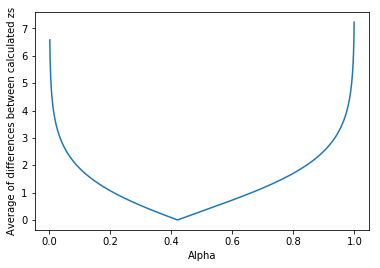

In [271]:
alphagrid = np.linspace(0, 1, 1000)

yaxis = np.zeros(len(alphagrid))
for i in range(len(alphagrid)):
    yaxis[i] = diff(data,alphagrid[i])

plt.plot(alphagrid, yaxis)
plt.xlabel("Alpha")
plt.ylabel("Average of differences between calculated zs")

#print("\n .8:", diff(data, .8), "\n .1:", diff(data, .1))
print("at alpha = .42, diff =:", diff(data, .42), " \n by w:", get_z(data.wt, data.kt, .42), "\n by r", get_z_2(data.rt, data.kt, .42))